# Stratified Shuffle K Fold cross-validation

Using KNN dataset to implement stratified shuffle K Fold cross-validation 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold, StratifiedShuffleSplit

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
data = pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
y = data['Type'].to_numpy()
X = data.drop(['Type'], axis=1).to_numpy()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42, stratify=y)

In [23]:
# Using Sklearn for stratified shuffle n-fold - StratifiedKFold
sss = StratifiedShuffleSplit(n_splits=5, random_state=0)
sss.get_n_splits(X_train, y_train)
k_choices = sorted([1, 3, 5, 8, 10, 12, 15, 20, 50])

k_accuracy = {}
count = 0

for k in k_choices:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    accuracy = []
    for train_index, val_index in sss.split(X_train, y_train):
#        print("TRAIN:", train_index, "TEST:", val_index)
        X_tr, X_val = X_train[train_index], X_train[val_index]
        y_tr, y_val = y_train[train_index], y_train[val_index]
        
        knn.fit(X_tr, y_tr)
        y_pred = knn.predict(X_val)
        
        accuracy.append(metrics.accuracy_score(y_val, y_pred))
    k_accuracy[k] = accuracy
    
print(k_accuracy)

{1: [0.6, 0.8666666666666667, 0.5333333333333333, 0.7333333333333333, 0.7333333333333333], 3: [0.7333333333333333, 0.7333333333333333, 0.4666666666666667, 0.6666666666666666, 0.6666666666666666], 5: [0.6666666666666666, 0.7333333333333333, 0.4, 0.6666666666666666, 0.5333333333333333], 8: [0.7333333333333333, 0.7333333333333333, 0.4666666666666667, 0.7333333333333333, 0.6], 10: [0.8, 0.7333333333333333, 0.4, 0.8, 0.6], 12: [0.8, 0.7333333333333333, 0.4, 0.8, 0.6], 15: [0.8, 0.7333333333333333, 0.4, 0.8, 0.5333333333333333], 20: [0.8, 0.6666666666666666, 0.4666666666666667, 0.7333333333333333, 0.6], 50: [0.6, 0.5333333333333333, 0.4, 0.7333333333333333, 0.3333333333333333]}


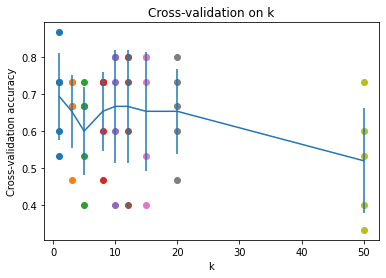

In [24]:
# plot the raw observations
for k in k_choices:
    accuracies = k_accuracy[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_accuracy.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_accuracy.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

# Best K

In [25]:
# Based on the cross-validation results above, choose the best value for k
best_k = k_choices[np.argmax(accuracies_mean)]
print("Best k is:",best_k)
print("Cross validation accuracy:",np.max(accuracies_mean))

Best k is: 1
Cross validation accuracy: 0.6933333333333334


## Report the final results on test data

In [26]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7323943661971831
